# Spatial Analysis

**By Stephanie Chang**

We wanted to conduct a spacial analysis on Oregon, which has a high amount of SNAP usage. I chose Portland, as it is a big city in Oregon and because it was the city I chose for the Twitter analysis. By conducting a detailed spatial analysis on the city, I see trends of neighborhoods with SNAP and use it to comapre with other data.

## Import Libraries
First I import the libraries needed for my code.

In [88]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

Then, I bring in my dataset, which looks at households with SNAP by census tracts. I used census tracts intead of block groups only because the dataset did not have data for the block groups.

In [89]:
gdf = gpd.read_file('acs2019_5yr_B22003_14000US41051008700.geojson')

## Data cleanup
Like always, I have to clean up my data by trimming and renaming my columns.

In [90]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             163 non-null    object  
 1   name              163 non-null    object  
 2   B22003001         163 non-null    float64 
 3   B22003001, Error  163 non-null    float64 
 4   B22003002         163 non-null    float64 
 5   B22003002, Error  163 non-null    float64 
 6   B22003003         163 non-null    float64 
 7   B22003003, Error  163 non-null    float64 
 8   B22003004         163 non-null    float64 
 9   B22003004, Error  163 non-null    float64 
 10  B22003005         163 non-null    float64 
 11  B22003005, Error  163 non-null    float64 
 12  B22003006         163 non-null    float64 
 13  B22003006, Error  163 non-null    float64 
 14  B22003007         163 non-null    float64 
 15  B22003007, Error  163 non-null    float64 
 16  geometry          

In [91]:
gdf.head()

,geoid,name,B22003001,"B22003001, Error",B22003002,"B22003002, Error",B22003003,"B22003003, Error",B22003004,"B22003004, Error",B22003005,"B22003005, Error",B22003006,"B22003006, Error",B22003007,"B22003007, Error",geometry
0,14000US41005020100,"Census Tract 201, Clackamas, OR",1696.0,116.0,99.0,48.0,6.0,9.0,93.0,48.0,1597.0,103.0,40.0,44.0,1557.0,111.0,"MULTIPOLYGON (((-122.70784 45.42448, -122.7073..."
1,14000US41005020800,"Census Tract 208, Clackamas, OR",2057.0,125.0,170.0,57.0,16.0,19.0,154.0,55.0,1887.0,136.0,140.0,81.0,1747.0,147.0,"MULTIPOLYGON (((-122.66098 45.45782, -122.6593..."
2,14000US41005020900,"Census Tract 209, Clackamas, OR",1715.0,88.0,323.0,93.0,183.0,85.0,140.0,69.0,1392.0,128.0,133.0,73.0,1259.0,144.0,"MULTIPOLYGON (((-122.63656 45.46147, -122.6351..."
3,14000US41005021000,"Census Tract 210, Clackamas, OR",2023.0,85.0,251.0,93.0,106.0,61.0,145.0,72.0,1772.0,109.0,184.0,78.0,1588.0,131.0,"MULTIPOLYGON (((-122.62224 45.45027, -122.6222..."
4,14000US41005021601,"Census Tract 216.01, Clackamas, OR",2485.0,130.0,477.0,180.0,123.0,122.0,354.0,153.0,2008.0,193.0,244.0,128.0,1764.0,228.0,"MULTIPOLYGON (((-122.60148 45.46130, -122.6014..."


In [92]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             163 non-null    object  
 1   name              163 non-null    object  
 2   B22003001         163 non-null    float64 
 3   B22003001, Error  163 non-null    float64 
 4   B22003002         163 non-null    float64 
 5   B22003002, Error  163 non-null    float64 
 6   B22003003         163 non-null    float64 
 7   B22003003, Error  163 non-null    float64 
 8   B22003004         163 non-null    float64 
 9   B22003004, Error  163 non-null    float64 
 10  B22003005         163 non-null    float64 
 11  B22003005, Error  163 non-null    float64 
 12  B22003006         163 non-null    float64 
 13  B22003006, Error  163 non-null    float64 
 14  B22003007         163 non-null    float64 
 15  B22003007, Error  163 non-null    float64 
 16  geometry          

In [93]:
gdf = gdf[['geoid','B22003001','B22003002','B22003003','B22003004','B22003005','B22003006','B22003007','geometry']]

gdf.columns = ['geoid','TotalPop','Household received Food Stamps/SNAP','Receive SNAP, Income below poverty level','Receive SNAP, Income at or above poverty level','Household did not receive Food Stamps/SNAP','No SNAP, Income below poverty level','No SNAP, Income at or above poverty level','geometry']

I check the last rows because I have to figure out which one is the last row that is the total for all of Portland, Oregon.

In [94]:
gdf.tail()

,geoid,TotalPop,Household received Food Stamps/SNAP,"Receive SNAP, Income below poverty level","Receive SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP,"No SNAP, Income below poverty level","No SNAP, Income at or above poverty level",geometry
158,14000US41067030402,2164.0,148.0,28.0,120.0,2016.0,138.0,1878.0,"MULTIPOLYGON (((-122.77417 45.47179, -122.7739..."
159,14000US41067030501,2117.0,219.0,23.0,196.0,1898.0,124.0,1774.0,"MULTIPOLYGON (((-122.78681 45.46447, -122.7866..."
160,14000US41067030502,1642.0,146.0,11.0,135.0,1496.0,109.0,1387.0,"MULTIPOLYGON (((-122.77406 45.45335, -122.7739..."
161,14000US41067030600,2342.0,275.0,125.0,150.0,2067.0,98.0,1969.0,"MULTIPOLYGON (((-122.76598 45.45350, -122.7659..."
162,16000US4159000,268718.0,40219.0,18145.0,22074.0,228499.0,17940.0,210559.0,"MULTIPOLYGON (((-122.56476 45.46045, -122.5641..."


After finding out that the row is row 162, I drop it.

In [95]:
gdf=gdf.drop(162)

Then, I fix the geoid by removing 1400US.

In [96]:
gdf['geoid'] = gdf['geoid'].str.replace('14000US','')
gdf.tail()

,geoid,TotalPop,Household received Food Stamps/SNAP,"Receive SNAP, Income below poverty level","Receive SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP,"No SNAP, Income below poverty level","No SNAP, Income at or above poverty level",geometry
157,41067030300,1863.0,49.0,0.0,49.0,1814.0,60.0,1754.0,"MULTIPOLYGON (((-122.77103 45.48647, -122.7710..."
158,41067030402,2164.0,148.0,28.0,120.0,2016.0,138.0,1878.0,"MULTIPOLYGON (((-122.77417 45.47179, -122.7739..."
159,41067030501,2117.0,219.0,23.0,196.0,1898.0,124.0,1774.0,"MULTIPOLYGON (((-122.78681 45.46447, -122.7866..."
160,41067030502,1642.0,146.0,11.0,135.0,1496.0,109.0,1387.0,"MULTIPOLYGON (((-122.77406 45.45335, -122.7739..."
161,41067030600,2342.0,275.0,125.0,150.0,2067.0,98.0,1969.0,"MULTIPOLYGON (((-122.76598 45.45350, -122.7659..."


Lastly, I want to get rid of census blocks groups with less than 100 total population. There is only one that is like that, so I get rid of that row.

In [97]:
gdf.sort_values(by='TotalPop').head(20)

,geoid,TotalPop,Household received Food Stamps/SNAP,"Receive SNAP, Income below poverty level","Receive SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP,"No SNAP, Income below poverty level","No SNAP, Income at or above poverty level",geometry
154,41051980000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.73038 45.56504, -122.7302..."
115,41051007300,186.0,38.0,21.0,17.0,148.0,22.0,126.0,"MULTIPOLYGON (((-122.64740 45.58272, -122.6468..."
79,41051004300,443.0,50.0,23.0,27.0,393.0,22.0,371.0,"MULTIPOLYGON (((-122.83296 45.60571, -122.8328..."
66,41051003603,675.0,80.0,10.0,70.0,595.0,51.0,544.0,"MULTIPOLYGON (((-122.63066 45.56388, -122.6306..."
25,41051001102,676.0,53.0,45.0,8.0,623.0,50.0,573.0,"MULTIPOLYGON (((-122.66284 45.51008, -122.6628..."
94,41051006001,725.0,65.0,33.0,32.0,660.0,41.0,619.0,"MULTIPOLYGON (((-122.69800 45.49538, -122.6975..."
120,41051007800,805.0,190.0,112.0,78.0,615.0,25.0,590.0,"MULTIPOLYGON (((-122.57562 45.55367, -122.5747..."
119,41051007700,815.0,144.0,49.0,95.0,671.0,19.0,652.0,"MULTIPOLYGON (((-122.57867 45.55266, -122.5786..."
82,41051004602,891.0,0.0,0.0,0.0,891.0,19.0,872.0,"MULTIPOLYGON (((-122.71936 45.50709, -122.7193..."
95,41051006002,954.0,77.0,28.0,49.0,877.0,25.0,852.0,"MULTIPOLYGON (((-122.69782 45.47790, -122.6970..."


In [98]:
gdf = gdf[gdf['TotalPop']>100]
gdf.sort_values(by='TotalPop').head(20)

,geoid,TotalPop,Household received Food Stamps/SNAP,"Receive SNAP, Income below poverty level","Receive SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP,"No SNAP, Income below poverty level","No SNAP, Income at or above poverty level",geometry
115,41051007300,186.0,38.0,21.0,17.0,148.0,22.0,126.0,"MULTIPOLYGON (((-122.64740 45.58272, -122.6468..."
79,41051004300,443.0,50.0,23.0,27.0,393.0,22.0,371.0,"MULTIPOLYGON (((-122.83296 45.60571, -122.8328..."
66,41051003603,675.0,80.0,10.0,70.0,595.0,51.0,544.0,"MULTIPOLYGON (((-122.63066 45.56388, -122.6306..."
25,41051001102,676.0,53.0,45.0,8.0,623.0,50.0,573.0,"MULTIPOLYGON (((-122.66284 45.51008, -122.6628..."
94,41051006001,725.0,65.0,33.0,32.0,660.0,41.0,619.0,"MULTIPOLYGON (((-122.69800 45.49538, -122.6975..."
120,41051007800,805.0,190.0,112.0,78.0,615.0,25.0,590.0,"MULTIPOLYGON (((-122.57562 45.55367, -122.5747..."
119,41051007700,815.0,144.0,49.0,95.0,671.0,19.0,652.0,"MULTIPOLYGON (((-122.57867 45.55266, -122.5786..."
82,41051004602,891.0,0.0,0.0,0.0,891.0,19.0,872.0,"MULTIPOLYGON (((-122.71936 45.50709, -122.7193..."
95,41051006002,954.0,77.0,28.0,49.0,877.0,25.0,852.0,"MULTIPOLYGON (((-122.69782 45.47790, -122.6970..."
68,41051003702,1027.0,197.0,120.0,77.0,830.0,22.0,808.0,"MULTIPOLYGON (((-122.67495 45.56304, -122.6749..."


## Mapping
Now I want to map my census tracts.

I get the layers into a web mercator projection & reproject to web mercator.

In [99]:
gdf = gdf.to_crs(epsg=3857)

Then, I plot it on a base map, and now I can see the census tracts of Portland, Oregon.

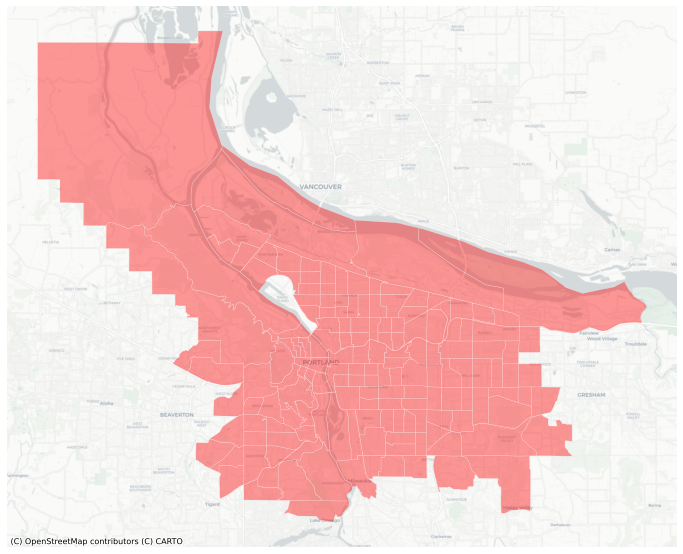

In [100]:
fig, ax = plt.subplots(figsize=(12,12))

gdf.plot(ax=ax,
         color='red', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Normalizing 
Because each census tract has different numbers of population, we want to normalize it so that there isn't misrepresenation.

In [101]:
gdf['snap_per_1000'] = gdf['Household received Food Stamps/SNAP']/gdf['TotalPop']*1000

In [102]:
gdf.sort_values(by="snap_per_1000").tail()

,geoid,TotalPop,Household received Food Stamps/SNAP,"Receive SNAP, Income below poverty level","Receive SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP,"No SNAP, Income below poverty level","No SNAP, Income at or above poverty level",geometry,snap_per_1000
136,41051009000,3418.0,1249.0,674.0,575.0,2169.0,206.0,1963.0,"MULTIPOLYGON (((-13640862.531 5697919.215, -13...",365.418373
141,41051009301,2332.0,873.0,487.0,386.0,1459.0,196.0,1263.0,"MULTIPOLYGON (((-13637824.845 5703975.010, -13...",374.356775
137,41051009101,2057.0,799.0,485.0,314.0,1258.0,64.0,1194.0,"MULTIPOLYGON (((-13639278.900 5701229.318, -13...",388.429752
153,41051010600,2156.0,870.0,650.0,220.0,1286.0,238.0,1048.0,"MULTIPOLYGON (((-13657363.530 5703248.473, -13...",403.525046
127,41051008301,1680.0,703.0,323.0,380.0,977.0,200.0,777.0,"MULTIPOLYGON (((-13645408.040 5699219.036, -13...",418.452381


Then, we can sort the data by descending SNAP households and mapping the top 20 census tracts with most SNAP households.

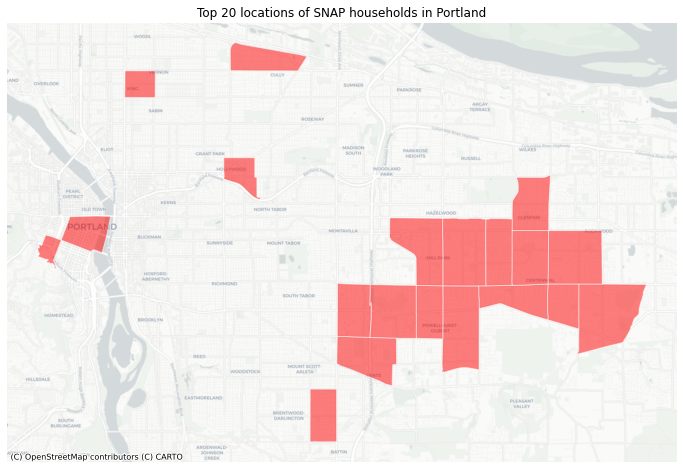

In [103]:
# map the top 20 geographies
fig,ax = plt.subplots(figsize=(12,10))
gdf.sort_values(by='snap_per_1000',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,legend=True)


# title
ax.set_title('Top 20 locations of SNAP households in Portland')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Cloropleth map
Then, we can generate a cloropleth map.

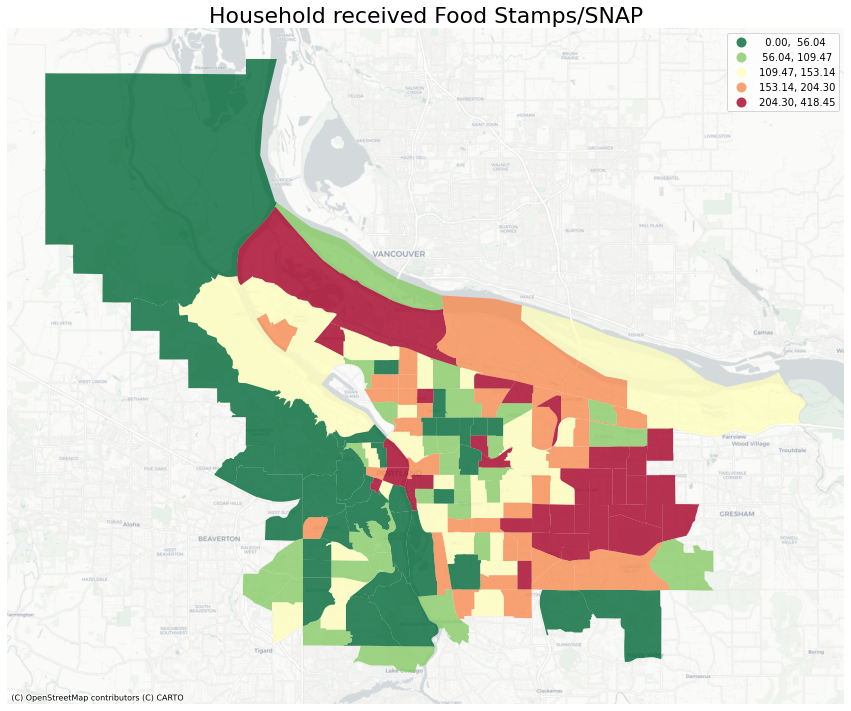

In [104]:
fig,ax = plt.subplots(figsize=(15,15))

gdf.plot(ax=ax,
        column='snap_per_1000',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='quantiles')

ax.axis('off')
ax.set_title('Household received Food Stamps/SNAP',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Global Spatial Autocorrelation
We can now conduct spatial autocorrelation to determine to what degree an existing pattern is or is not random.

We can compare each geography based on a the number of households that receive SNAP with that of its neighbors. First, we define spatial weight, determining the area’s neighborhood. We calculate the spatial weight and also We also row standardize the data.


In [105]:
wq =  lps.weights.KNN.from_dataframe(gdf,k=8)

wq.transform = 'r'

Then, we use the spatial weights to calculate the spatial lag.

In [106]:
gdf['snap_per_1000_lag'] = lps.weights.lag_spatial(wq, gdf['snap_per_1000'])

In [107]:
gdf.sample(10)[['TotalPop','Household received Food Stamps/SNAP','snap_per_1000','snap_per_1000_lag']]

,TotalPop,Household received Food Stamps/SNAP,snap_per_1000,snap_per_1000_lag
77,2066.0,286.0,138.431752,151.735399
126,3254.0,855.0,262.753534,232.597650
128,1579.0,435.0,275.490817,262.884140
98,1710.0,25.0,14.619883,79.983960
75,1722.0,224.0,130.081301,129.852258
103,2099.0,286.0,136.255360,63.341748
22,2003.0,332.0,165.751373,104.155213
6,2462.0,45.0,18.277823,182.096697
44,1969.0,206.0,104.621635,115.439192
49,1788.0,443.0,247.762864,77.429130


This tells you which census tracts are around other census tracts that are either high in SNAP households or low in SNAP households.

### Spatial Lag Map
From the spatial lag column, we can map it out to get a map that displays geographies weighted against the values of its neighbors.

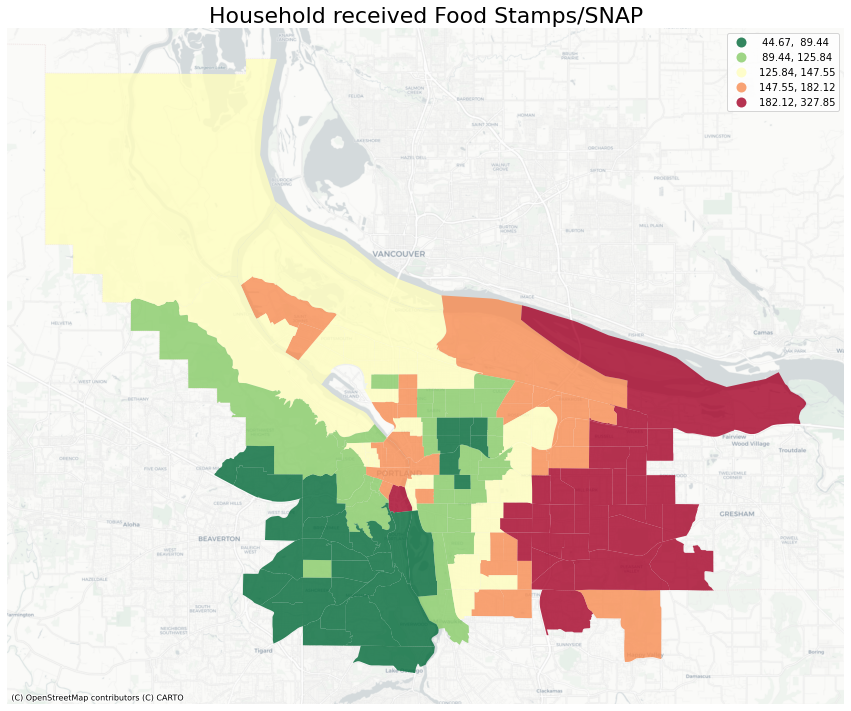

In [108]:
fig,ax = plt.subplots(figsize=(15,15))


gdf.plot(ax=ax,
        column='snap_per_1000_lag',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='quantiles')

ax.axis('off')
ax.set_title('Household received Food Stamps/SNAP',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Side-by-side maps
We can also compare the two maps already made.

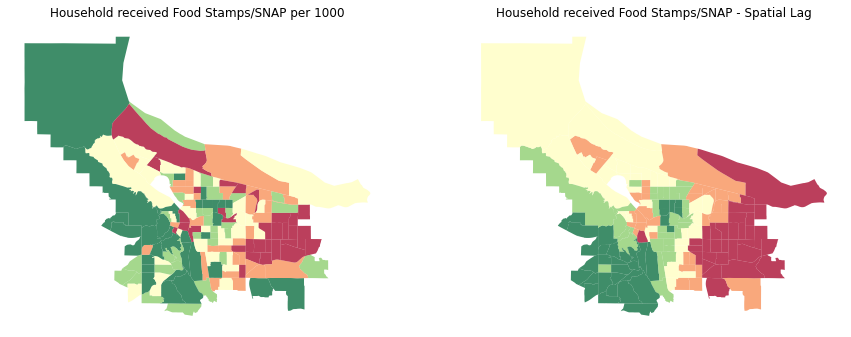

In [109]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         column='snap_per_1000', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
           )


ax[0].axis("off")
ax[0].set_title("Household received Food Stamps/SNAP per 1000")

# spatial lag map on the right
gdf.plot(ax=ax[1], # this assigns the map to the right subplot
         column='snap_per_1000_lag', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[1].axis("off")
ax[1].set_title("Household received Food Stamps/SNAP - Spatial Lag")

plt.show()

### Moran's Plot
After having a spatial lag map, we can quantify the degree of spatial correlations. First, we test for global autocorrelation for a continuous attribute (Households with SNAP).

In [110]:
y = gdf.snap_per_1000
moran = Moran(y, wq)
moran.I

0.4383478147235339

The positive spatial autocorrelation means that high values are close to high values and low values are close to low values.

Next, I output a scatterplot.

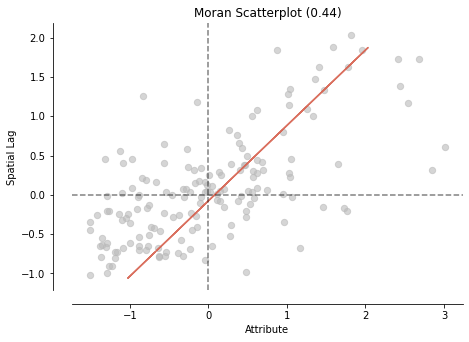

In [111]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

We can compare our Moran value of 0.4 to a simulation of 999 permutations that randomly shuffles the SNAP households data throughout the given geographies. 

The output is a sampling distribution of Moran’s I values under the (null) hypothesis that attribute values are randomly distributed across the study area. We then compare our observed Moran’s I value to this "Reference Distribution."

/opt/conda/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:47: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.

/opt/conda/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:48: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f85f718d160>)

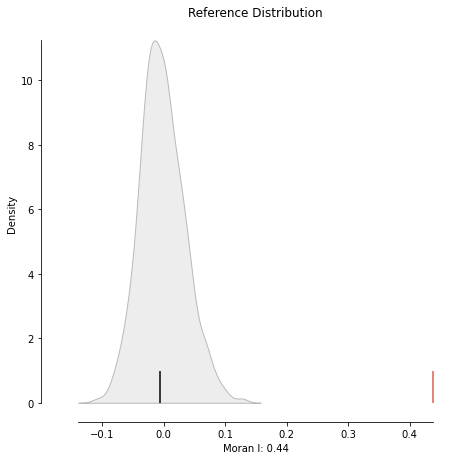

In [112]:
plot_moran_simulation(moran,aspect_equal=False)

In [113]:
moran.p_sim

0.001

This P-value is the proportion of realisations in the simulation under spatial randomness that are more extreme than the observed value. Because the p-value is pretty small, we can reject the hypothesis that the map is random and say that the map displays more spatial pattern than we would expect if the values had been randomly allocated to a locations.

## Local Spatial Autocorrelation
Using Local Spatial Autocorrelation, we can determine where the clusters are.

First, we calculate the local Moran values.

In [114]:
lisa = esda.moran.Moran_Local(y, wq)

Then, we plot those values, showing areas with high amount of SNAP households near to high amount of SNAP households (HH), Low amount of SNAP households  with nearby low amount of SNAP households (LL), Low amount of SNAP households  with high amount of SNAP households  in its neighborhood, and vice-versa.

The colored dots are the census tract groups that have a P-value less that 0.05 in each quadrant and are statistically significant clusters.

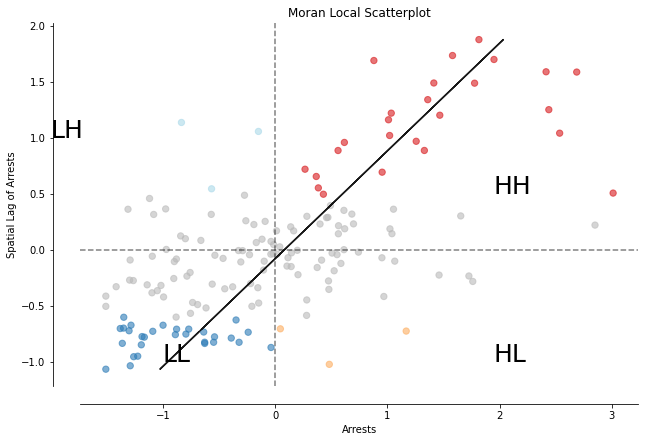

In [115]:
fig,ax = plt.subplots(figsize=(10,15))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Arrests")
ax.set_ylabel('Spatial Lag of Arrests')

# add some labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

We can map the statistically significant clusters out.

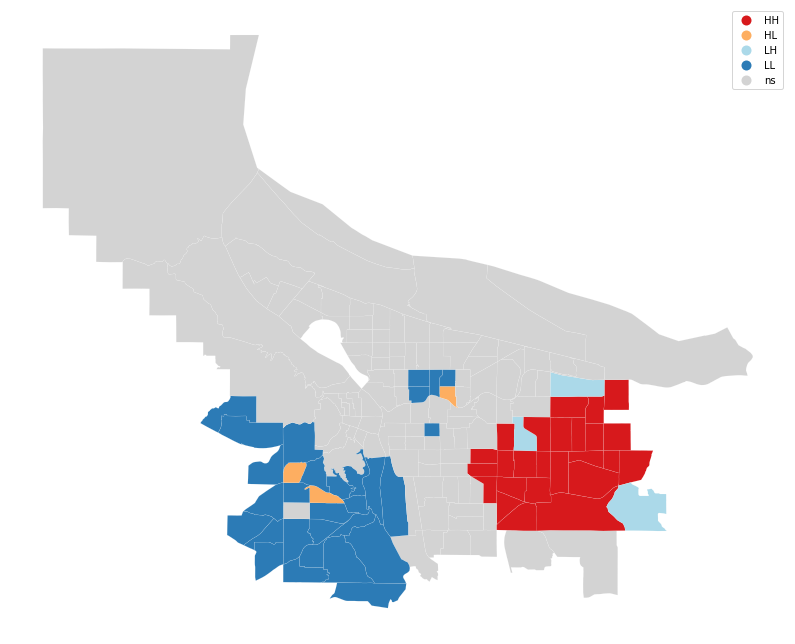

In [116]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(lisa, gdf, p=0.05, ax=ax)
plt.show()

Lastly, we can create a map comparing different p values.

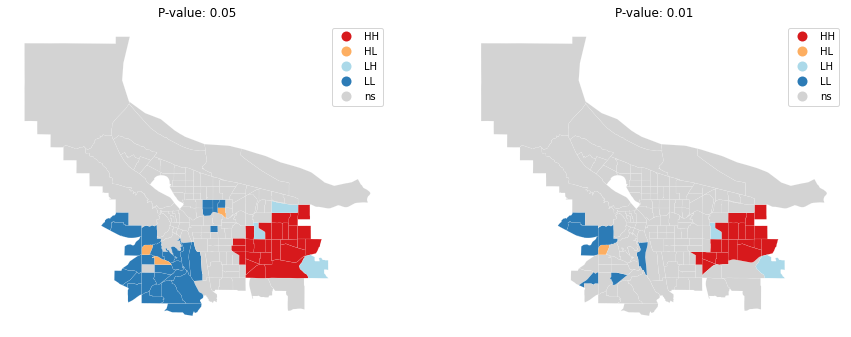

In [117]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# regular count map on the left
lisa_cluster(lisa, gdf, p=0.05, ax=ax[0])

ax[0].axis("off")
ax[0].set_title("P-value: 0.05")

# spatial lag map on the right
lisa_cluster(lisa, gdf, p=0.01, ax=ax[1])
ax[1].axis("off")
ax[1].set_title("P-value: 0.01")

plt.show()